## Исследование данных о российском кинопрокате



Заказчик этого исследования — Министерство культуры Российской Федерации.
Нужно изучить рынок российского кинопроката и выявить текущие тренды. Уделить внимание фильмам, которые получили государственную поддержку. Попробую ответить на вопрос, насколько такие фильмы интересны зрителю, а так же провести самостоятельное исследование и найти любопытные закономерности в данных.
Шаги исследования:
1. Открыть файлы и объединить их  в один датасет.
2. Произвести предобработку данных
- заменить/удалить пропуски
- проработать явные и неявные дубликаты
- изучить столбцы с категориальными значениями, исправить возможные ошибки
- изучить столбцы с числовыми значениями
3. Изменить типы данных в столбцах, по необходимости
4. Создать столбцы с годом проката, с основными жанрами, с основными режиссерами, с суммой/долей гос поддержки, с прибылью проката.
5. Провести исследовательский анализ данных ответив на вопросы:
-  сколько фильмов выходило в прокат каждый год.
- Изучить, как менялась динамика проката по годам.
- посчитать среднюю и медианную сумму сборов для каждого года
- Определить, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма
6. Найти любопытные закономерности в данных.

### Шаг 1. Откройте файлы с данными и объедините их в один датафрейм. 

Объединяю данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм. 



In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
pd.options.display.float_format = '{:,.2f}'.format

movies = pd.read_csv('/datasets/mkrf_movies.csv')
shows = pd.read_csv('/datasets/mkrf_shows.csv')
movies[movies['puNumber']=='нет'] 
movies.loc[1797,'puNumber']=0
movies['puNumber'] = movies['puNumber'].astype('int64')
#заменил на ноль значение "нет", мешающее изменить тип данных для слияния
#Меняю тип данных общего столбца для слияния двух таблиц
df = pd.merge(movies,shows, on='puNumber', how="left")
#Объединяю две таблицы 



In [2]:
df.head(1)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   int64  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

### Шаг 2. Предобработка данных

#### Шаг 2.1. Проверяю типы данных

- Проверить типы данных в датафрейме и преобразовать их там, где это необходимо.

In [4]:
df.rename(columns={'puNumber':'pu_number'}, inplace=True)
#привёл к змеиному регистру

df['show_start_date']=pd.to_datetime(df['show_start_date']).dt.date
#убрал время из даты, не несло нагрузки, мешало.
df['show_start_date'] = pd.to_datetime(df['show_start_date'], format="%Y-%m-%d")
#тип datetime64 для столбца show_start_date

pd.options.display.float_format = '{:,}'.format
#для отображения суммы сборов в удобном формате
df.style.format({'refundable_support': '{:.2f}'})
#для убоюбного отображения возвратных средств гос.
df.style.format({'nonrefundable_support': '{:.2f}'})
#для убоюбного отображения невозвратных средств гос.
df.style.format({'budget': '{:.2f}'})

df.head(5)

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


#### Шаг 2.2. Изучаю пропуски в датафрейме

- Объяснение, почему заполнил пропуски определённым образом или почему не стал этого делать.

In [5]:
print(df.isna().sum())
#кол-во пропусков в каждом столбце

df.isna().mean()*100
#доля пропусков в каждом столбце

title                       0
pu_number                   0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
ratings                   967
genres                    976
box_office               4328
dtype: int64


title                                   0.0
pu_number                               0.0
show_start_date                         0.0
type                                    0.0
film_studio             0.24044883783061713
production_country      0.02671653753673524
director                0.12022441891530856
producer                  7.587496660432808
age_restriction                         0.0
refundable_support        95.56505476890194
nonrefundable_support     95.56505476890194
budget                    95.56505476890194
financing_source          95.56505476890194
ratings                  12.917445899011486
genres                   13.037670317926796
box_office                57.81458722949506
dtype: float64

1. В столбце   film_studio, director, producer, genres, production_country, financing_source заменю пропуски на "unknown". Так как природа возникновения этих пропусков представляется мне в следствии тех причин. Такая информация есть у каждого фильма без исключения и её отсутствие говорит о потери информации.
2. В стобцах относящихся к гос финансированию 'refundable_support', 'nonrefundable_support', 'budget' заменяю на ноль так как эти столбцы содержат информацию только для фильмов, которые получили гос поддержку, следовательно остальные фильмы её не получали и это корректно заменить на ноль.
3. Пропуски в кассовых оставляю. 
4. Избавившись от NaN меняю типы данных в столбцах
5. Значения столбца ratings освобождаю от строчных значений и меняю тип данных.

In [6]:
col_name=[ 'film_studio', 'director', 'producer', 'genres',  'production_country', 'financing_source']
for val in col_name:
    df[val].fillna('unknown', inplace=True)
df.isna().sum() 
col_name_zer=['refundable_support', 'nonrefundable_support', 'budget']
for val in col_name_zer:
    df[val].fillna(0, inplace=True)
    df[val]=df[val].astype('int32')

df['ratings']=df['ratings'].str.replace('%', '')
df['ratings']=df['ratings'].str.strip()
df['ratings']=df['ratings'].astype('float32')

for idx, val in df['ratings'].items():
    if val>10:
        df.loc[idx,'ratings']=val/10
# избавился от строчных значений рейтингов в процентах%

#### Шаг 2.3. Изучитить дубликаты в датафрейме
- Проверить, есть ли в данных дубликаты. Причины, которые могли повлиять на появление дублей.

In [7]:
df.type.value_counts()
#в колонке type заметил неявные дубликаты "художественный" и " художественный"
df['type']=df['type'].str.strip()
#пробел удалён методом strip
delit=['ООО ','"','Р А И', 'Эр А И', 'АНО', 'АО', 'Анимейшн', 'Дистрибьюшн', 'Пикчерз', 'Продакшнз', 'Продакшнс', 'Продакшн', 'мувиз', 'Студиос',
      'Филмз', 'Лтд', 'Медиа', 'Пикчерс', 'Продакшнс', 'студиос', 'продакшн', 'Киностудия', 'Ассоциация']
for val in delit:
    df['film_studio']=df['film_studio'].str.replace(val, '') 
    df['film_studio']=df['film_studio'].str.strip()
df['film_studio'].value_counts().head(50)
df.loc[df['film_studio']=='100 Барес','film_studio']='100 Барс'
df.loc[df['film_studio']=='Опус Арте','film_studio']='Опус Арт'
df.loc[df['film_studio']=='Уолт Дисней  , Уолт Дисней','film_studio']='Уолт Дисней'
#Почитстил неявные дубликаты в film_studio

def country_name(name):
    name=str(name)
    name.strip()
    if 'unknown' in name:
        return 'unknown'
    elif name.isupper():
        if '-' in name:
            temp= name.split('-')
            new_name= ','.join([ele for ele in temp])
            return new_name
        else:
            return name
    elif '-' in name:
        temp= name.split('-')
        new_name= ','.join([ele for ele in temp])
        return new_name
    elif ',' in name:
        if '.'in name:
            temp=name.split('.')
            temp=name.split(',')
            new_name=','.join([ele for ele in temp])
            return new_name
        else:
            return name
    
df['production_country']=df['production_country'].apply(country_name)  
#Функция приводящая названия стран к более общему виду

df['production_country']=df['production_country'].str.replace(' , ', ', ')
df['production_country']=df['production_country'].str.replace(', ', ',')                  
df['production_country']=df['production_country'].str.replace('США,Великобритания', 'Великобритания,США')
df['production_country']=df['production_country'].str.replace('США,Канада', 'Канада,США')
df['production_country']=df['production_country'].str.replace('США,Франция', 'Франция,США')
df['production_country']=df['production_country'].str.replace('Франция,Великобритания', 'Великобритания,Франция')        
df.loc[df['production_country']=='СССР ','production_country']='СССР'
#Почитстил неявные дубликаты в production_country

df['director']=df['director'].str.strip()
#Почитстил неявные дубликаты в director

df['producer']=df['producer'].str.strip()
df.loc[df['producer']=='П.П.Смирнов','producer']='П.Смирнов'
#Почитстил неявные дубликаты в producer
df['title']=df['title'].str.strip()
#в title решил не обрабатывать значения так как 

Проверил колонки на наличие дублей. Основными причинами появления дублей стали:
1. Наличие/отсутствие доп слов (студия, киностудия, ассоциация)  
2. Наличие сокращений и абревиатур (ООО ,ОАО, АО, АНО)
3. Заимствованные слова в разной транслитерации (студиос-студиоз, продакшн-продакшен и тд)
4. Нестандартизированное написание стран производителей через дефис, через запятую, через пробел.
5. Не следование алфавитному порядку (США,Великобритания-Великобритания,США)
6. Наличие пробелов перед и после.
7. Нестандартизированное написание инициалов(П.П.Смирнов-П.Смирнов)

#### Шаг 2.4. Изучаю категориальные значения

- Какая общая проблема встречается почти во всех категориальных столбцах;
- Исправляю проблемные значения в поле `type`.



Вовремя работы с дублями, сразу разобрался с пробелами используя str.strip() см.Шаг 2.3

#### Шаг 2.5. Проверить количественные значения

- Проверяю, данные на противоричивость.


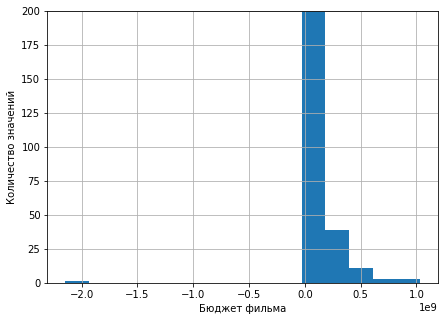

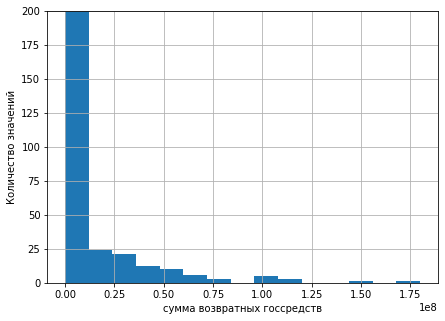

Text(0, 0.5, 'Количество значений')

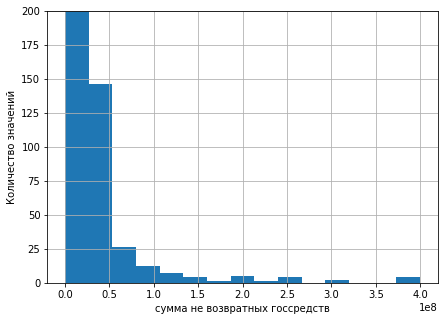

In [8]:
df['budget'].plot(kind='hist',figsize=(7,5), grid=True, bins=15) 
plt.ylim(0,200)
plt.xlabel("Бюджет фильма")
plt.ylabel("Количество значений")
plt.show()
df['refundable_support'].plot(kind='hist',figsize=(7,5), grid=True, bins=15)
plt.ylim(0,200)
plt.xlabel("сумма возвратных госсредств")
plt.ylabel("Количество значений")
plt.show()
df['nonrefundable_support'].plot(kind='hist',figsize=(7,5), grid=True, bins=15)
plt.ylim(0,200)
plt.xlabel("сумма не возвратных госсредств")
plt.ylabel("Количество значений")

In [9]:
df.query('budget!=0')
df['total_budget']=df['refundable_support']+df['nonrefundable_support']
df.query('budget<total_budget')

df['costs_share']=(df['budget']-(df['refundable_support']+df['nonrefundable_support']))/df['budget']+1
#создаю новый столбец с долей издержек в бюджете фильма.
temp=df.query('budget<total_budget')['budget']
#сортирую строки в которых общий бюджет меньше двух гос поддержек
for idx, val in temp.items():
#Прохожу по индексам отфильтрованного датасета    
    df.loc[idx,'budget']=(df.loc[idx,'refundable_support']+df.loc[idx,'nonrefundable_support'])* df['costs_share'].median()
#Значения бюджета меняю на сумму двух господдержек умноженную на медианный повышающий коэффицент издержк на фильм
df.query('budget<(refundable_support+nonrefundable_support)')
df.query('budget<total_budget')
# Проверяю остались ли неправильные строки.


,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,total_budget,costs_share


Text(0, 0.5, 'Количество значений')

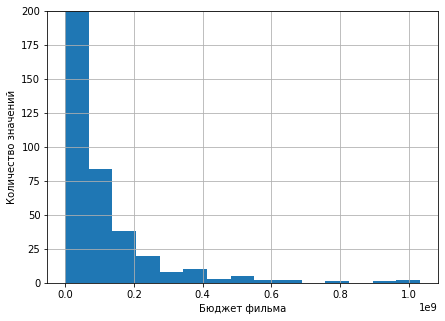

In [10]:
df['budget'].plot(kind='hist',figsize=(7,5), grid=True, bins=15) 
plt.ylim(0,200)
plt.xlabel("Бюджет фильма")
plt.ylabel("Количество значений")

Бюджет фильма с гос поддержкой складываается из двух частей(возвратные средства и невозвратные), исходя из этого budget>= 'refundable_support'+'nonrefundable_support' Отфильтровал строки неудовлетворяющие этой логике. Сделал доп столбец 'total_budget' с суммой гос поддержки.
Не разобрался как поменять масштаб графика, чтоб рассмотреть не нулевые значения. Но из графиков увидел что есть значения по оси Х в невозвратных и возвратных госсредставах и они по идее должны были отразиться на оси Х у графика с бюджетом фильма но их нет.

#### Шаг 2.6. Добавить новые столбцы





- Создам столбец с информацией о годе проката.

In [11]:
df['year']=df['show_start_date'].dt.year
df

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,total_budget,costs_share,year
0,Открытый простор,221048915,2015-11-27,Художественный,"Тачстоун , Кобальт , Бикон , Тиг",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,0,0,0.0,unknown,7.199999809265137,"боевик,драма,мелодрама",NaN,0,NaN,2015
1,Особо важное задание,111013716,2016-09-13,Художественный,Мосфильм,СССР,Е.Матвеев,unknown,«6+» - для детей старше 6 лет,0,0,0.0,unknown,6.599999904632568,"драма,военный",NaN,0,NaN,2016
2,Особо опасен,221038416,2016-10-10,Художественный,"Юниверсал , Кикстарт , Марк Платт , Рилейтивит...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0,0,0.0,unknown,6.800000190734863,"фантастика,боевик,триллер",NaN,0,NaN,2016
3,Особо опасен,221026916,2016-06-10,Художественный,"Юниверсал , Кикстарт , Марк Платт , Рилейтивит...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0,0,0.0,unknown,6.800000190734863,"фантастика,боевик,триллер",NaN,0,NaN,2016
4,Особо опасен,221030815,2015-07-29,Художественный,"Юниверсал , Кикстарт , Марк Платт , Рилейтивит...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0,0,0.0,unknown,6.800000190734863,"фантастика,боевик,триллер",NaN,0,NaN,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7481,Сад художника: Американский импрессионизм,126008019,2019-12-23,Прочие,Севен Артс,None,Фил Грабски,Фил Грабски,«12+» - для детей старше 12 лет,0,0,0.0,unknown,NaN,unknown,NaN,0,NaN,2019
7482,Звериная ярость,121037819,2019-12-24,Художественный,"Дэниел Гродник , Вандерфилм Корпорэйшн, Импри...",США,Ник Пауэлл,"Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэ...",«16+» - для детей старше 16 лет,0,0,0.0,unknown,5.400000095367432,"боевик,триллер",NaN,0,NaN,2019
7483,Щенячий патруль: Скорей спешим на помощь!,124010819,2019-12-28,Художественный,"Никелодеон , Спин Мастер","Канада,США",Чарльз Е.Бастьен,Дженнифер Додж,«0+» - для любой зрительской аудитории,0,0,0.0,unknown,NaN,unknown,NaN,0,NaN,2019
7484,"Машины песенки. Серия ""Испанские мотивы""",124010619,2019-12-30,Анимационный,"Анимаккорд ., Студия АНИМАККОРД","Республика Кипр,Россия",А.Беляев,Д.Ловейко,«0+» - для любой зрительской аудитории,0,0,0.0,unknown,NaN,unknown,NaN,0,NaN,2019


- Создам два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.


In [12]:
def genre_main(genre):
    temp=str(genre).split(',')
    new_genre=temp[0]
    return new_genre
df['main_genre']=df['genres'].apply(genre_main)
df['main_director']=df['director'].apply(genre_main)
# одна функция для двух столбцов

- Посчитал, какую долю от общего бюджета фильма составляет государственная поддержка.

In [13]:
df['gov_share']=(df['refundable_support']+df['nonrefundable_support'])/df['budget']


df[~df['gov_share'].isna()]
df['gov_share']=df['gov_share'].round(2)
df[~df['gov_share'].isna()]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,financing_source,ratings,genres,box_office,total_budget,costs_share,year,main_genre,main_director,gov_share
1281,Пока еще жива,111005313,2013-10-11,Художественный,содействия развитию кинематографии Ангел-Фильм...,None,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0,...,Министерство культуры,8.100000381469727,"драма,мелодрама","365,353.6",26500000,1.6662968648275638,2013,драма,А.Атанесян,0.33
1448,Бесславные придурки,111003314,2014-03-28,Художественный,Компания АТК-Студио,None,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0,...,Министерство культуры,NaN,unknown,"28,140.0",26000000,1.2999999973076923,2014,unknown,А.Якимчук,0.7
1498,Невидимки,111004213,2013-09-10,Художественный,Компания РЕАЛ-ДАКОТА,None,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0,...,Фонд кино,5.300000190734863,"комедия,фантастика","19,957,031.5",107847945,1.3873093585407266,2013,комедия,Р.Давлетьяров,0.61
1524,БЕРЦЫ,111004314,2014-05-05,Художественный,Студия Пассажир,None,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0,...,Министерство культуры,4.199999809265137,драма,"55,917.5",28000000,1.3099052746404483,2014,драма,Е.Миндадзе (псевдоним Катя Шагалова),0.69
1792,Братья Ч,111004414,2014-04-23,Художественный,Студия Пассажир,None,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0,...,Министерство культуры,6.400000095367432,драма,"232,100.0",25000000,1.3752361919576304,2014,драма,М.Угаров,0.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7464,Союз спасения,111022019,2019-12-26,Художественный,З Дирекция кино,None,А.Кравчук,"А.Максимов, К.Эрнст",«12+» - для детей старше 12 лет,100000000,...,Фонд кино,6.0,"история,биография,драма","717,703,185.53",500000000,1.489795918367347,2019,история,А.Кравчук,0.51
7466,Иван Царевич и Серый Волк 4,114005019,2019-12-20,Анимационный,Студия анимационного кино Мельница,None,"Д.Шмидт, К.Феоктистов","С.Сельянов, А.Боярский",«6+» - для детей старше 6 лет,100000000,...,Фонд кино,6.699999809265137,"мультфильм,приключения,семейный","501,069,235.0",100000000,1.4736842105263157,2019,мультфильм,Д.Шмидт,0.53
7474,Вторжение,111022519,2019-12-23,Художественный,"Арт Студия, Водород 2011",None,Ф.Бондарчук,"Ф.Бондарчук, М.Врубель, А.Андрющенко, Д.Рудовский",«12+» - для детей старше 12 лет,100000000,...,Фонд кино,5.699999809265137,"фантастика,боевик",NaN,500000000,1.4703389830508475,2019,фантастика,Ф.Бондарчук,0.53
7476,Я свободен,111023019,2019-12-26,Художественный,ТПО им. М.Горького,None,И.Северов,С.Зернов,«12+» - для детей старше 12 лет,0,...,Министерство культуры,5.900000095367432,драма,NaN,30000000,1.3500021666594444,2019,драма,И.Северов,0.65


### Шаг 3. Проведите исследовательский анализ данных


- Смотрю, сколько фильмов выходило в прокат каждый год. Расчитаю, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

<div class="alert alert-info"> <b></b> Вариант решения №1</div>

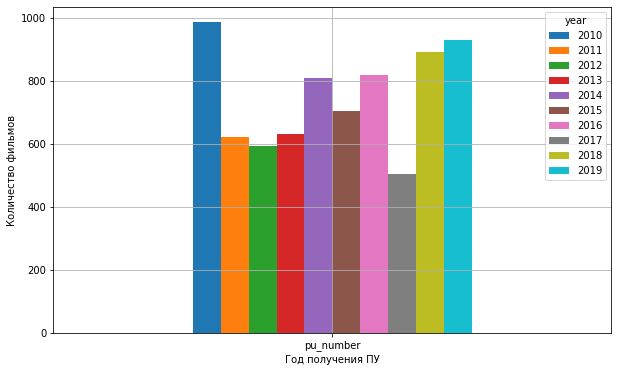

year,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
pu_number,985,622,593,630,807,705,818,505,891,930


In [14]:
df_pu=df.pivot_table(columns='year', values='pu_number', aggfunc='count').plot(kind='bar', figsize=(10,6), grid=True,rot=0)
plt.xlabel("Год получения ПУ")
plt.ylabel("Количество фильмов")
plt.show()
df_pu=df.pivot_table(columns='year', values='pu_number', aggfunc='count')
#кол-во фильмов которые получили прокатное удостоверение

share=len(df[~df['box_office'].isna()])/len(df['pu_number'])
#доля филмов в датасете по которым есть информация о прокате (0,42)
df_pu

Удалось выяснить, что данные о кассовых сборах фильмов составляют всего 42% от данных по прокатным удостоверениям. Считаю что мы не можем корректно выяснить в какой из годов активность в сфере коммерческого кино была максимальной/минимальной, используя данные по кассовым сборам. Предлагаю оценить тренд по кол-ву получаемых прокатных удостоверений. Так в 2010году было максимальное значение-986шт, а в 2017 минимальное-505шт.
Так же исследование по кассовым сборам выраженное в денежных единицах, на таком протяженном периоде(10лет) будет не корректным, так как на его результаты будет влиять инфляция и колебание цены билетов. Считаю, что при наличии должного объема данных по кассовым сборам, нужна доп инфа по среднему ценнику билета за каждый год, тогда бы мы расчитали активность в сфере кинотеатров по кол-ву проданных былетов и это было бы точнее, чем по денежной массе.

<div class="alert alert-info"> <b></b> Вариант решения №2</div>

Исследуя данные по кассовым сборам и посчитав строки в столбце box_office по годам, можно сделать вывод, что с 2010 по 2019 годы наблюдается тренд на увелечение фильмов в прокате. С минимальным значением 105 картин в 2010году и 530 картин в 2019. Так же виден спад в 2017 и 2018 годах, отличающийся от общей тенденции роста кол-ва картин в прокате.

year,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
box_office,105,109,128,184,279,465,526,357,475,530


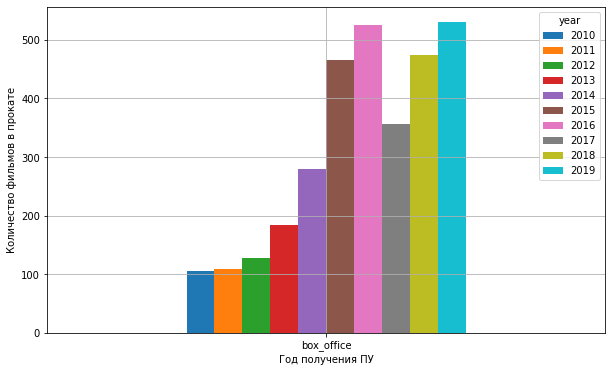

In [15]:
df_box=df.pivot_table(columns='year', values='box_office', aggfunc='count').plot(kind='bar', figsize=(10,6), grid=True, rot=0)
plt.xlabel("Год получения ПУ")
plt.ylabel("Количество фильмов в прокате")
df_box=df.pivot_table(columns='year', values='box_office', aggfunc='count')
df_box

In [16]:
df_temp=df[~df['box_office'].isna()]
df_temp=df_temp[df_temp['box_office']!=0]
df_temp.pivot_table(index='year', aggfunc='count', values='box_office')/len(df)

,box_office
year,
2010,0.013491851456051297
2011,0.014560512957520704
2012,0.01643067058509217
2013,0.023911301095378038
2014,0.0364680737376436
2015,0.061715201709858405
2016,0.07013091103393
2017,0.0476890195030724
2018,0.06345177664974619


- Динамика проката по годам.

year,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
box_office,"2,428,654.0","14,102,765.0","6,955,423.0","29,799,706.2","7,444,951,859.200001","39,497,365,196.40001","47,866,299,741.91004","48,563,707,217.51","49,668,403,134.31999","48,425,708,779.59"


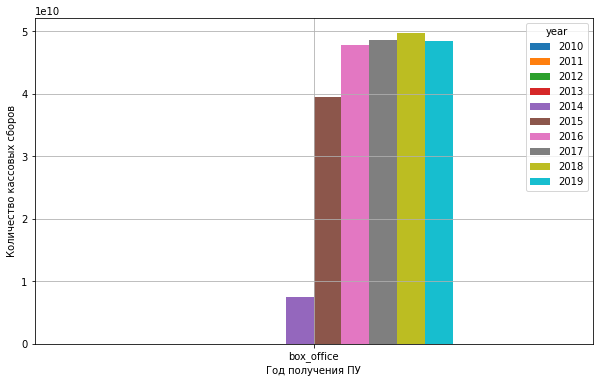

In [17]:
df_box=df.pivot_table(columns='year', values='box_office', aggfunc='sum').plot(kind='bar', figsize=(10,6), grid=True, rot=0)
plt.xlabel("Год получения ПУ")
plt.ylabel("Количество кассовых сборов")
df_box=df.pivot_table(columns='year', values='box_office', aggfunc='sum')
df_box

Исходя из того, что наполненность данных по кассовым сборам с 2010 по 2014 годы крайне низкая, предлагаю не интерпретировать эти данные как низкие кассовые сборы, предлагаю интерпретировать как отсутствие информации и невозможность сделать выводы по тем годам. С 2014 года по 2019 годы наблюдается рост объема информации, с падением в 2017 году, но не смотря на это можем сделать вывод о росте кассовых сборов сравнивая годы со схожим объемом данных- например 2014(3,7%) и 2017(4,7%) и разницей кассовых сборов более чем в 5 раз в сторону увеличения.

- Среднюю и медианную сумму сборов для каждого года.

Text(0, 0.5, 'Сумма кассовых сборов')

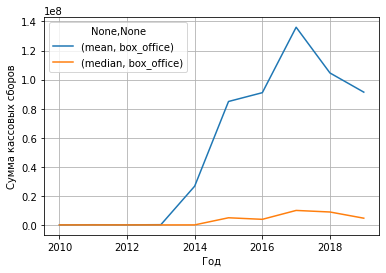

In [18]:
#расчет средней суммы сборов для каждого года
box_mean = df.pivot_table(index='year', values='box_office', aggfunc=['mean','median']).plot(kind='line', grid=True)
plt.xlabel("Год")
plt.ylabel("Сумма кассовых сборов")


In [19]:
df['box_office'].describe()

count                3,158.0
mean     76,478,696.16121913
std     240,353,122.82324007
min                      0.0
25%                 86,239.0
50%             2,327,987.55
75%           23,979,671.025
max         3,073,568,690.79
Name: box_office, dtype: float64

Медианная и средняя сумма кассовых сборов по годам очень разнятся. Это же подтверждает и большое стандартное отклонение по столбцу box_office выведенное через .describe(). Этот факт говорит о большом разбросе числовых значений, что означает очень разные суммы сборов для разных фильмов.

- Определить, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? С чем это может быть связано?

Суммы сборов в разных возрастных кат-ях по годам


age_restriction,«0+» - для любой зрительской аудитории,«12+» - для детей старше 12 лет,«16+» - для детей старше 16 лет,«18+» - запрещено для детей,«6+» - для детей старше 6 лет
year,,,,,
2015,"379,054,578.37","13,616,082,008.909998","11,368,120,870.27","5,432,308,367.4400015","8,701,799,371.41"
2016,"150,228,848.67","12,204,446,524.389997","16,664,548,541.740004","6,793,929,818.869999","12,053,146,008.240002"
2017,"229,598,930.0","7,851,427,660.67","18,745,042,900.06","9,651,495,581.02","12,086,142,145.76"
2018,"32,449,002.11","14,267,291,660.69","16,503,602,346.959997","8,760,085,501.15","10,104,974,623.41"
2019,"17,746,066.82","12,680,198,773.67","12,753,418,984.600002","10,121,796,303.640003","12,852,548,650.859997"


Суммы сборов в разных возрастных кат-ях за период 2015-2019


age_restriction,«0+» - для любой зрительской аудитории,«12+» - для детей старше 12 лет,«16+» - для детей старше 16 лет,«18+» - запрещено для детей,«6+» - для детей старше 6 лет
box_office,"809,077,425.9700001","60,619,446,628.329994","76,034,733,643.62994","40,759,615,572.12","55,798,610,799.680016"


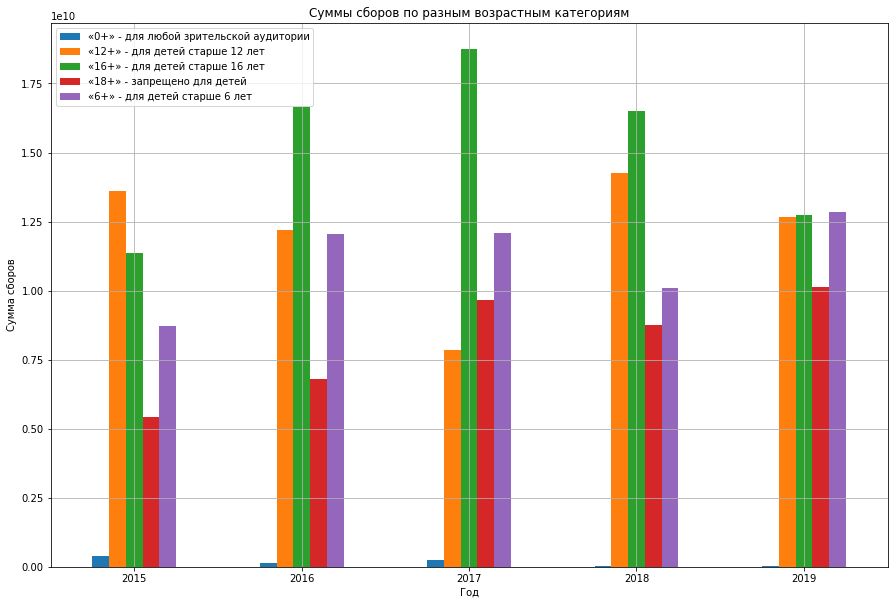

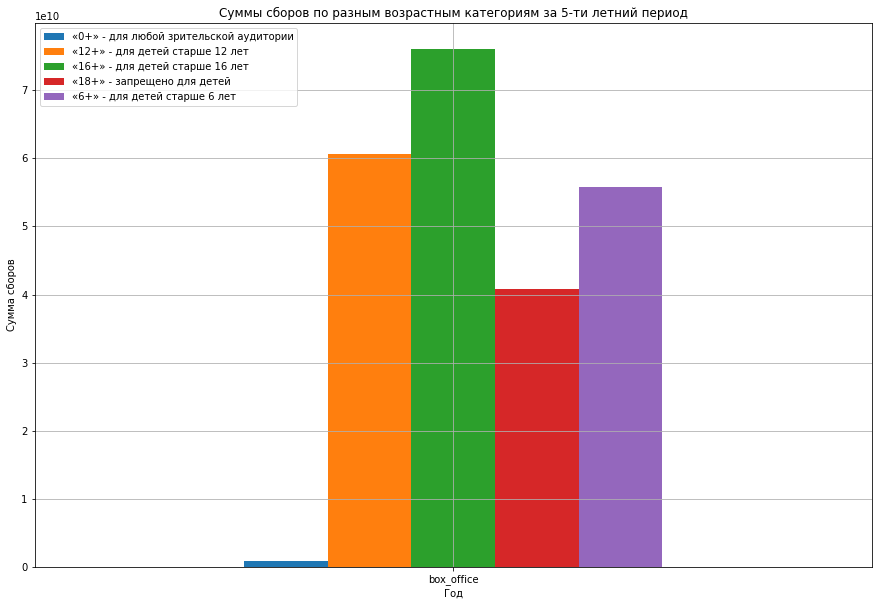

In [20]:
locs = ['best', 'upper right', 'upper left', 'lower left']

df.query('2019>=year>=2015').pivot_table(index='year',columns='age_restriction', values='box_office', aggfunc='sum').plot(kind='bar', figsize=(15,10), grid=True, rot=0)
box_every_year=df.query('2019>=year>=2015').pivot_table(index='year',columns='age_restriction', values='box_office', aggfunc='sum')
plt.ylabel("Сумма сборов")
plt.xlabel("Год")
plt.legend(loc=locs[2])
plt.title("Суммы сборов по разным возрастным категориям")
#здесь код для сводной таблицы по каждому году для каждой возр.группы с суммами сборов.

box_sum=df.query('2019>=year>=2015').pivot_table(columns='age_restriction', values='box_office', aggfunc='sum')
df.query('2019>=year>=2015').pivot_table(columns='age_restriction', values='box_office', aggfunc='sum').plot(kind='bar', figsize=(15,10), grid=True, rot=0)
plt.title("Суммы сборов по разным возрастным категориям за 5-ти летний период")
plt.legend(loc=locs[2])
plt.ylabel("Сумма сборов")
plt.xlabel("Год")
#здесь код для сводной таблицы по 5 годам с 2015 по 2019 для каждой возр.группы с суммами сборов.

print('Суммы сборов в разных возрастных кат-ях по годам')
display(box_every_year)
print('Суммы сборов в разных возрастных кат-ях за период 2015-2019')
box_sum


Изучив сводные таблицы и графики, могу сделать вывод, что за период с 2015 по 2019 год самая кассовая группа по возрастному ограничению это- "16+" со сборами 76,034,733,644руб. Самый низкий показатель за этот переиод у фильмов с ограничением "0+" с 809,077,426руб. Из пяти рассмотренных лет фильмы с рейтингом "16+" лишь дважды лишились первенства: в 2015году уступив фильмам "12+" и в 2019 уступив фильмам "6+". Доминирование группы "16+" могу объяснить тем, что самые кассовые блок бастеры и например фильмы из вселенных DC и Marvel выходят в рейтинге "16+". Группы "6+" и "12+" так же имеют высокие сборы, например фильмы Уолта Диснея, Пиксар и т.д. имеют рейтинг "6+" и "12+" и радуют зрителя блокбастерами с большими кассовыми сборами. 	
Почему есть колебания в разных годах между кассовыми сборами- предположу, что на это влияет кол-во блокбастеров выходящих с тем или иным возрастным рейтингом. 
Из данного исследования можно зключить, что возрастной рейтинг влияет на суммы кассовых сборов не линейно.


### Шаг 4. Исследую фильмы, которые получили государственную поддержку



,gov_mon
year,
2010,0.0
2011,0.0
2012,0.0
2013,"134,347,945.0"
2014,"572,002,299.0"
2015,"3,656,241,459.0"
2016,"4,303,155,482.0"
2017,"3,183,971,662.0"
2018,"3,446,969,465.0"


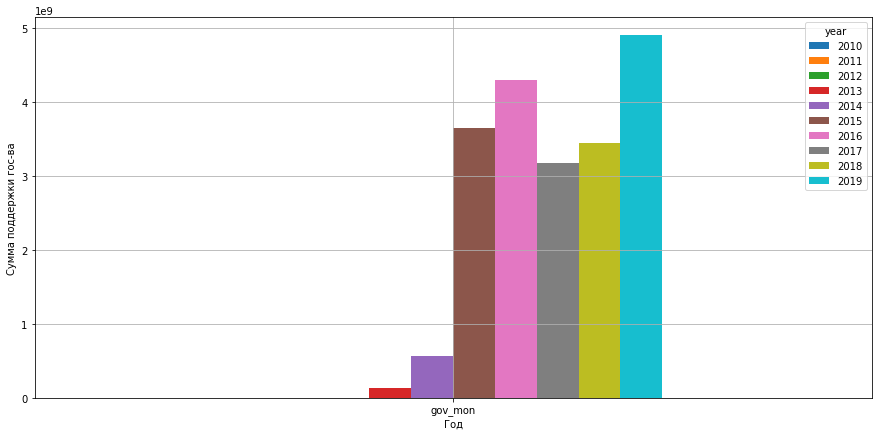

In [21]:
df['gov_mon']=df['refundable_support']+df['nonrefundable_support']
#создал стобец для суммы гос поддержки

df['profit']=df['box_office']-df['budget']
#стобец для суммы прибыли

gov_sup=df.pivot_table(index='year', values='gov_mon', aggfunc='sum')
df.pivot_table(columns='year', values='gov_mon', aggfunc='sum').plot(kind='bar', figsize=(15,7), grid=True, rot=0)
plt.ylabel("Сумма поддержки гос-ва")
plt.xlabel("Год")
gov_sup
#сводная таблица и график динамики роста гос помощи



Государство начало поддерживать кинематограф начиная с 2013 года с минимальной суммы в 134,347,945р, нарашивая суммы поддержки до 2016 года, 2017 и 2018 годы выбиваются из тренда роста уступая годам 2016 и 2017, и в 2019 году рекордная сумма гос поддержки в 4,904,000,000 руб.

year,2013,2014,2015,2016,2017,2018,2019
profit,"-235,113,004.9","-293,904,552.06477654","-2,076,306,126.6073546","-1,579,853,656.1485724","3,880,826,014.1988688","2,799,249,886.967326","-963,366,527.8112819"


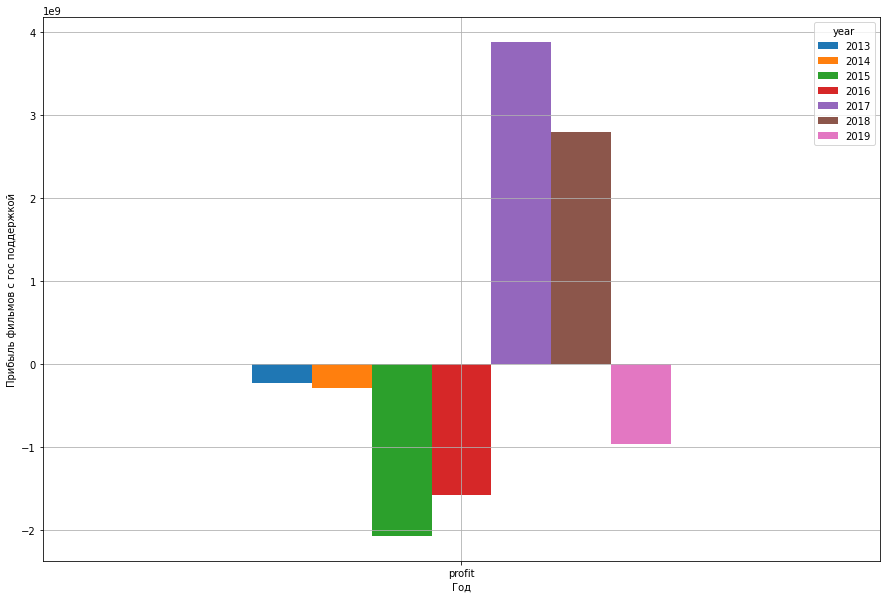

In [22]:
gov_prof=df.query('gov_mon!=0').pivot_table(columns='year', values='profit', aggfunc='sum')
df.query('gov_mon!=0').pivot_table(columns='year', values='profit', aggfunc='sum').plot(kind='bar', figsize=(15,10), grid=True, rot=0)
plt.ylabel("Прибыль фильмов с гос поддержкой")
plt.xlabel("Год")
gov_prof
#Сводная таблица динамики прибыльности фильмов с гос поддержкой

До 2017 года кино с гос поддержкой было убыточным и не принесло прибыли, самыми убыточними были годы 2015,2016. С 2017 года наблюдается резкий скачок прибыли, но с убывающей тенденцией. Пик в 2017 году и далее по снисходящей.

year,2013,2014,2015,2016,2017,2018,2019
ratings,6.700000286102295,6.400000095367432,6.199999809265137,5.800000190734863,6.199999809265137,6.199999809265137,6.199999809265137


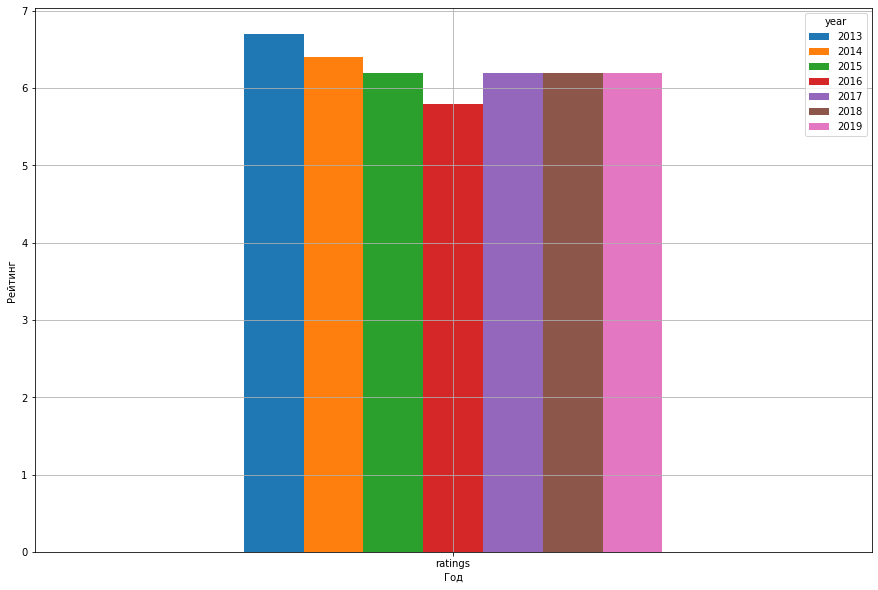

In [23]:
gov_rate=df.query('gov_mon!=0').pivot_table(columns='year', values='ratings', aggfunc='median')
df.query('gov_mon!=0').pivot_table(columns='year', values='ratings', aggfunc='median').plot(kind='bar', figsize=(15,10), grid=True, rot=0)
plt.ylabel("Рейтинг")
plt.xlabel("Год")
gov_rate
#сводная таблица и график рейтингов фильмов с гос поддержкой

Рейтинг фильмов с гос поддержкой варьируется по годам. Максимальный средний рейтинг в 2013 году 6.7, минимальный в 2016 со средней оценкой 5.8

Text(0.5, 1.0, 'Рейтинги фильмов с без гос поддержки')

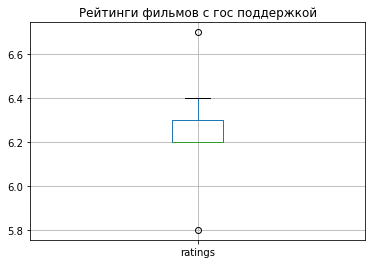

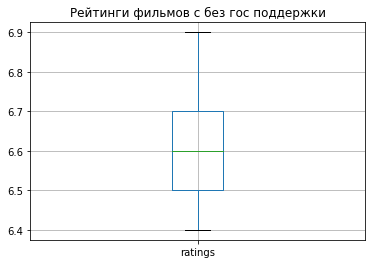

In [24]:
df.query('gov_mon!=0').pivot_table(index='year', values='ratings', aggfunc='median').plot(kind='box', grid=True)
plt.title('Рейтинги фильмов с гос поддержкой')
df.query('gov_mon==0').pivot_table(index='year', values='ratings', aggfunc='median').plot(kind='box', grid=True)
plt.title('Рейтинги фильмов с без гос поддержки')

Построив бокс плоты могу прокомментрировать качество получаемых рейтингов. Видно что медианный рейтинг филмов с гос поддержкой 6.2, а филмов без господдержки 6.6 Так же фильмы без господдержки имеют максимум положительного уса на рейтинге 6.9, а с гос поддержкой в 6.4 Эти факты говорят, что обычно фильмы с гос поддержкой менее интересны зрителю, чем фильмы без гос поддержки. Так же настораживает тот факт, что на графике гос фильмов медиана совпадает с первой квартилью, как я это понимаю, обычно(чаще) эти фильмы получают низкие оценки. Судя по усу, оценки обычно не выше 6.4, а оценка 6.7 уже является аномально высокой

year,2013,2014,2015,2016,2017,2018,2019
box_office,"20,322,385.1","1,017,422,166.6","5,785,285,418.140002","6,081,707,839.1","10,865,075,300.960001","9,934,069,010.25","8,409,627,454.63"


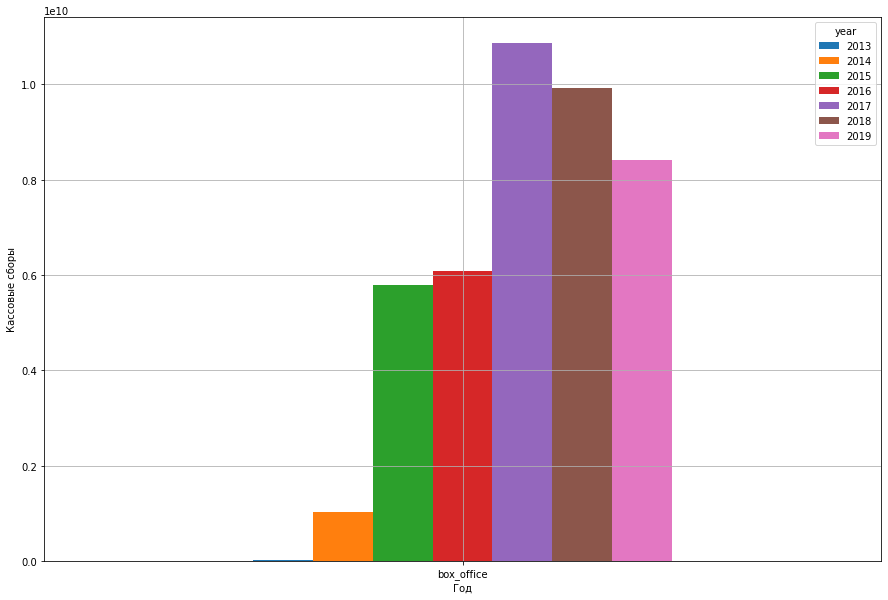

In [25]:
df.query('gov_mon!=0').pivot_table(columns='year',values='box_office', aggfunc='sum' ).plot(kind='bar', figsize=(15,10), grid=True, rot=0)
gov_cash=df.query('gov_mon!=0').pivot_table(columns='year',values='box_office', aggfunc='sum' )
plt.ylabel("Кассовые сборы")
plt.xlabel("Год")
gov_cash
#Динамика кассовых сборов

Динамика роста кассовых сборов положительная до 2017года с пиком в 10,865,075,301руб, после 2017 года выручки начинают падать, с шагом примерно 10% в год.

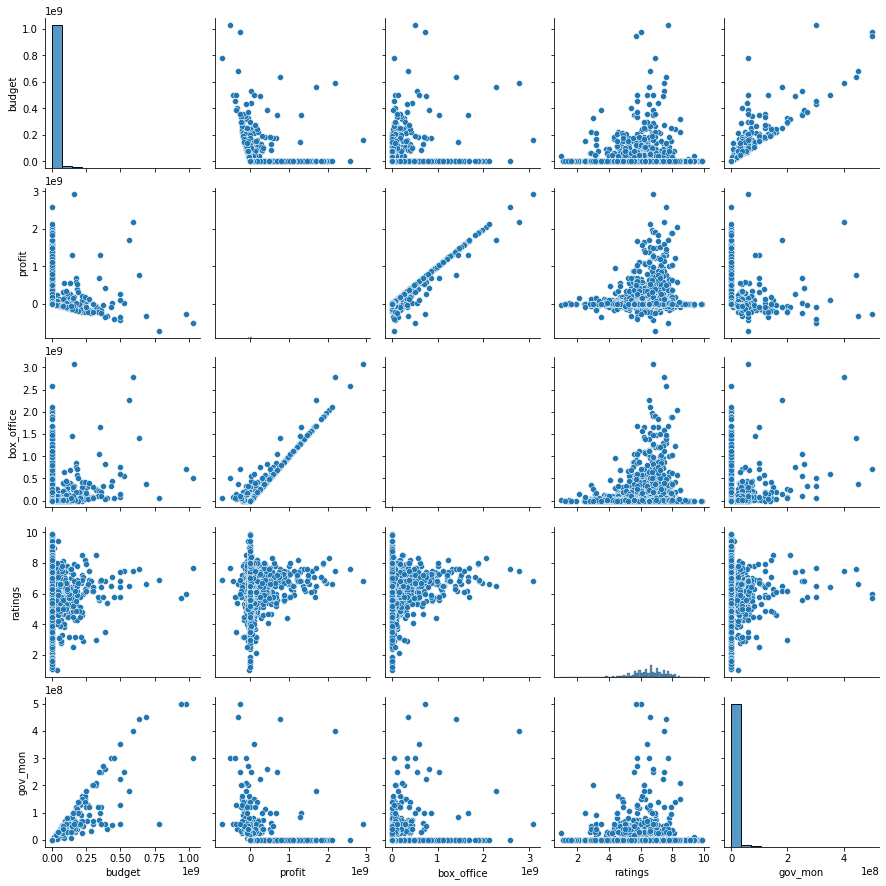

In [26]:
sns.pairplot(df[['budget', 'profit', 'box_office', 'ratings', 'gov_mon']])
#исследовал линейные зависимости числовых величин

In [27]:
df[['budget', 'profit', 'box_office', 'ratings', 'gov_mon']].corr()  
#Коэффицент Пирсона

,budget,profit,box_office,ratings,gov_mon
budget,1.0,-0.03478977947620854,0.20994654212979794,-0.041046390567876165,0.9093363408412827
profit,-0.03478977947620854,1.0,0.9698170165249126,0.09408079637417008,-0.0034448380872679368
box_office,0.20994654212979794,0.9698170165249126,1.0,0.0872301799028668,0.21597365558159085
ratings,-0.041046390567876165,0.09408079637417008,0.0872301799028668,1.0,-0.04173408797600534
gov_mon,0.9093363408412827,-0.0034448380872679368,0.21597365558159085,-0.04173408797600534,1.0


Из кореляционного исследования видно, что самая крепкая положительная взаимосвязь между кассовыми сборами и прибылью и это логично. Связь между поддержкой гос-ва и суммой бюджета так же положительная и явно прослеживаемая и в этом случае всё очевидно и логично. Есть слабая положительная связь между кассовыми сборами и поддержкой государства, можно сделать вывод, что в ряде случаев увеличение суммы гос поддержки, приведет к повышению кассовых сборов. Есть слабая кореляция положительная между бюджетом и кассовыми сборами, при увеличении бюджета фильма в ряде случаев растет и его кассовый сбор. Не обнаружено взаимосвязи между прибылью и гос поддержкой. Не обнаружено взаимосвязи рейтинга фильма с другими велечинами.

type,Анимационный,Документальный,Музыкально-развлекательный,Научно-популярный,Прочие,Художественный
box_office,"43,193,935,737.71999","66,266,378.300000004","1,416,635.0","25,657,603.5","303,229,676.45000005","197,929,216,446.15988"


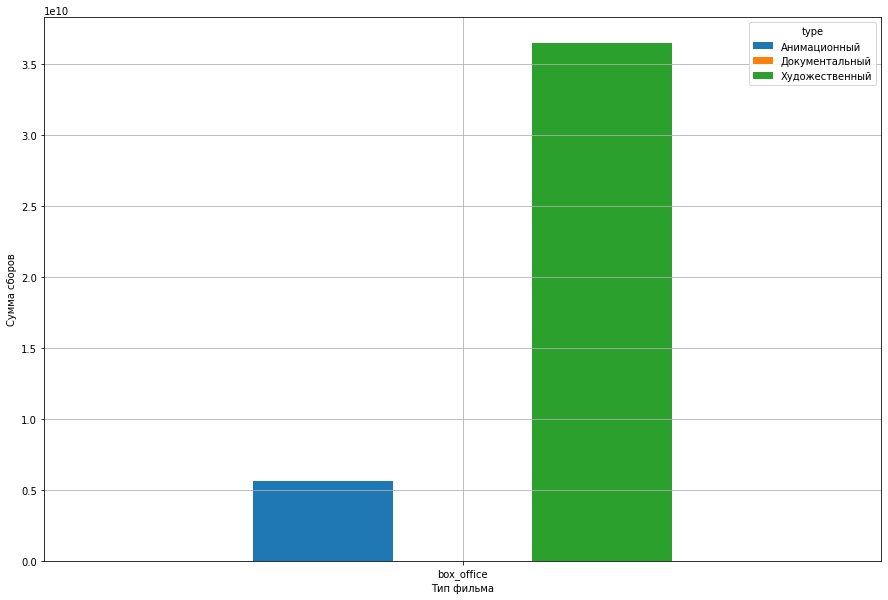

In [28]:
df.query('gov_mon!=0').pivot_table(columns='type', values='box_office', aggfunc='sum').plot(kind='bar', figsize=(15,10), grid=True, rot=0)
plt.ylabel("Сумма сборов")
plt.xlabel("Тип фильма")
mov_type=df.pivot_table(columns='type', values='box_office', aggfunc='sum')
mov_type

Значения этого графика могу интерпритировать как кассовые сборы фильмов более чем в 4 раза больше чем мультфильмов.


Text(0.5, 0, 'Жанр')

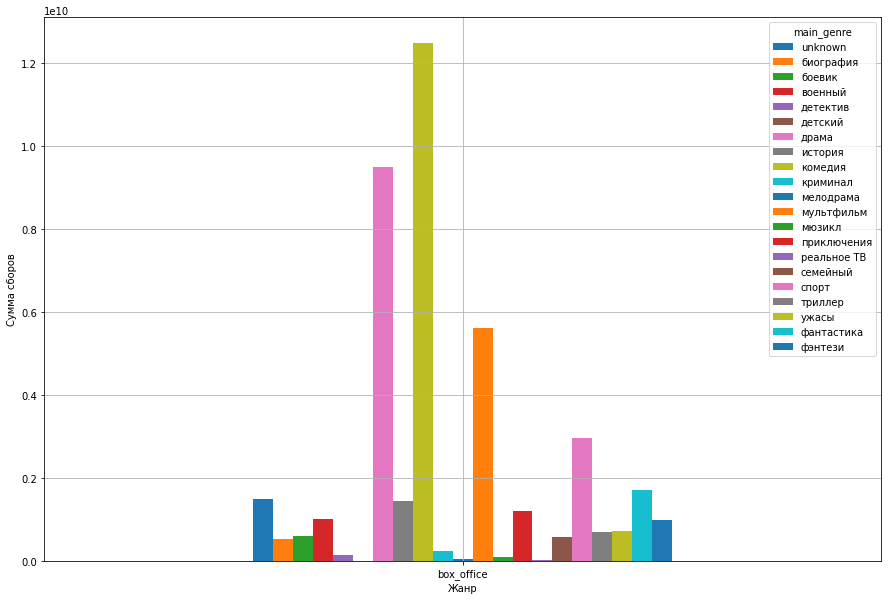

In [29]:
df.query('gov_mon!=0').pivot_table(columns='main_genre', values='box_office', aggfunc='sum').plot(kind='bar', figsize=(15,10), grid=True, rot=0)
plt.ylabel("Сумма сборов")
plt.xlabel("Жанр")

Вывод: Самые кассовые жанры фильмов с гос поддержкой в порядке убывания выглядят так:
1. Комедия
2. Драма
3. Мультфильмы
4. Спорт
5. Фантастика

In [30]:
df

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,genres,box_office,total_budget,costs_share,year,main_genre,main_director,gov_share,gov_mon,profit
0,Открытый простор,221048915,2015-11-27,Художественный,"Тачстоун , Кобальт , Бикон , Тиг",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,0,...,"боевик,драма,мелодрама",NaN,0,NaN,2015,боевик,Кевин Костнер,NaN,0,NaN
1,Особо важное задание,111013716,2016-09-13,Художественный,Мосфильм,СССР,Е.Матвеев,unknown,«6+» - для детей старше 6 лет,0,...,"драма,военный",NaN,0,NaN,2016,драма,Е.Матвеев,NaN,0,NaN
2,Особо опасен,221038416,2016-10-10,Художественный,"Юниверсал , Кикстарт , Марк Платт , Рилейтивит...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0,...,"фантастика,боевик,триллер",NaN,0,NaN,2016,фантастика,Тимур Бекмамбетов,NaN,0,NaN
3,Особо опасен,221026916,2016-06-10,Художественный,"Юниверсал , Кикстарт , Марк Платт , Рилейтивит...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0,...,"фантастика,боевик,триллер",NaN,0,NaN,2016,фантастика,Тимур Бекмамбетов,NaN,0,NaN
4,Особо опасен,221030815,2015-07-29,Художественный,"Юниверсал , Кикстарт , Марк Платт , Рилейтивит...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0,...,"фантастика,боевик,триллер",NaN,0,NaN,2015,фантастика,Тимур Бекмамбетов,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7481,Сад художника: Американский импрессионизм,126008019,2019-12-23,Прочие,Севен Артс,None,Фил Грабски,Фил Грабски,«12+» - для детей старше 12 лет,0,...,unknown,NaN,0,NaN,2019,unknown,Фил Грабски,NaN,0,NaN
7482,Звериная ярость,121037819,2019-12-24,Художественный,"Дэниел Гродник , Вандерфилм Корпорэйшн, Импри...",США,Ник Пауэлл,"Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэ...",«16+» - для детей старше 16 лет,0,...,"боевик,триллер",NaN,0,NaN,2019,боевик,Ник Пауэлл,NaN,0,NaN
7483,Щенячий патруль: Скорей спешим на помощь!,124010819,2019-12-28,Художественный,"Никелодеон , Спин Мастер","Канада,США",Чарльз Е.Бастьен,Дженнифер Додж,«0+» - для любой зрительской аудитории,0,...,unknown,NaN,0,NaN,2019,unknown,Чарльз Е.Бастьен,NaN,0,NaN
7484,"Машины песенки. Серия ""Испанские мотивы""",124010619,2019-12-30,Анимационный,"Анимаккорд ., Студия АНИМАККОРД","Республика Кипр,Россия",А.Беляев,Д.Ловейко,«0+» - для любой зрительской аудитории,0,...,unknown,NaN,0,NaN,2019,unknown,А.Беляев,NaN,0,NaN


### Шаг 5. Напишите общий вывод

При объединении двух датасетов возникло большое кол-во пропусков, так как количество строк датасетов отличалось почти вдвое. Плюс к этому датасет с информацией о господдержке имел множество пропусков, так как 95% фильмов в нём не имели гос поддержки. Провёл работу по устранению пропусков. В столбцах по гос поддержке заменил на ноль, так как фильмы без гос поддержки не получали дотаций. 
В столбцах с категориальными переменными пропуски значений заменил на тех значение "unknown". Отсуствие пропусков позволяет применять большее кол-во методов к данным и менять тип данных при необходимости. Так же в столбцах с категориальными значениями выявил множество неявных дубликатов, обработал их спомощью функций, циклов и методов. Подробнее в шаге 2.3. 
Убрал из столбцов с численными значения строчные значения, что позволило изменить тип данных(int/float).
Изменил формат даты и времени, а так же формат отображения больших чисел в столбцах, для удобства чтения.
Создал несколько столбцов для расчетов описательной статистики и более полных выводов, подробнее в теле исследования.

Исследуя кинопрокат за период 2010-2019 годы пришел к следующим выводам:
1. Количество фильмов за исследуемый период выросло со 105шт(2010г) до 530(2019г). Стоит отметить, доля фильмов в датасете по которым есть информация о кассовых сборах составила 42% от объема датасета. Предположу, что этого объема достаточно для выявления тенденции.
2. Подобная тенденция роста наблюдается и в денежном выражении кассовых сборов. минимум в 2010г, максимум в 2017г 49,668,403,134руб
3. Выделил самую прибыльную возрастную группу в периоде с 2015 по 2019г. Это "16+" со сборами 76,034,733,644руб. Антирекорд поставила группа фильмов с ограничением "0+" 809,077,426руб.

Что касается фильмов с гос поддержкой. Основным вопросом исследования ставиться задача понять, являются ли такие фильмы привлекательными для зрителя. В процессе поиска ответа на этот вопрос я обнаружил немало заслуживающей внимания информации:

1. Размер гос поддержки в сфере кино, за исследуемый период рос от года к года, со спадом в 2017-18г и в 2019 году поставил  рекорд в 4,904,000,000 руб
2. Прибыльность фильмов с гос участием в период  с 2013 по 2016г включительно была отрицательной, с 2017года ситуация изменилась, появилась прибыль, причем в 2017г был ее пик с последующим снижением. Тревожный сигнал для отрасли.
3. Тип фильма собирающий больше всего касс сборов- художественный фильм, далее мультипликация, остальные типы фильмов несоизмеримо менее кассовые.
4.  Самые кассовые жанры фильмов с гос поддержкой в порядке убывания выглядят так:
- Комедия
- Драма
- Мультфильмы
- Спорт
- Фантастика

И теперь перехожу к пунктам, которые позволили мне ответить на вопрос исследования.

5. Рейтинг фильмов с гос поддержкой варьируется по годам. Максимальный средний рейтинг в 2013 году 6.7, минимальный в 2016 со средней оценкой 5.8
6. Динамика роста кассовых сборов положительная до 2017года с пиком в 10,865,075,301руб, после 2017 года выручки начинают падать, с шагом примерно 10% в год.

Проанализировав выше описанные пункты могу прийти к выводу, что кино с гос поддержкой интересно зрителю, но заинтересованность ниже чем в фильмах без господдержки. Рейтинги по годам указывают на то, что более половины опрошеных удовлетворены фильмом, так же наблюдается рост кассовых сборов и окупаемости картин, несколько "портит" статистику тот факт что основные коммерческие метрики(сборы и прибыль) начинают снижаться с 2017 года. Считаю, что программа финансирования государством сферы кинемотографа приносит положительный результат и перспективна. 

Рекомендации:

1. Более тщательно изучить потребности рынка и предпочтения аудитории, для максимизации удовлеторенности целевой аудитории и как следствие максимизации прибыли.
2. Расширить сегмент рынка, а именно расширить ассоримент снимаемой кинопродукции, как в жанрах, так и в типах фильмов. Такой подход позволит охватить разные сегменты зрителей, которым нравятся разные жанры кино.
3. Повышать кол-во гос помощи и повышать эффективность её использования, для создания более качественного продукта и увеличения спроса на этот продукт(фильм) и как следствие повышение оценок рейтингов, кассовых сборов и прибыли. 
4. Запуск высоко рейтинговых продуктов на стриминговых платформах, съемка сиквелов, приквелов и спиноффов для пользующихся спросом фильмов.
5. Более тщательно вести базы данных, избегать утери данных и различных разночтений информации, для более точной и быстрой аналитики и, как следствие, принятие взвешенных обоснованных решений для развития сферы кино с гос поддержкой.
